<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Dataset" data-toc-modified-id="Import-Libraries-and-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and Dataset</a></span></li><li><span><a href="#Data-Analysis-and-Engineering" data-toc-modified-id="Data-Analysis-and-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis and Engineering</a></span></li><li><span><a href="#Anomaly-Detection-using-Autoencoder" data-toc-modified-id="Anomaly-Detection-using-Autoencoder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Anomaly Detection using Autoencoder</a></span><ul class="toc-item"><li><span><a href="#Define-the-autoencoder-model" data-toc-modified-id="Define-the-autoencoder-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Define the autoencoder model</a></span></li><li><span><a href="#Compile-and-fit-the-model" data-toc-modified-id="Compile-and-fit-the-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compile and fit the model</a></span></li><li><span><a href="#Calculate-the-reconstruction-error-for-each-data-point" data-toc-modified-id="Calculate-the-reconstruction-error-for-each-data-point-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Calculate the reconstruction error for each data point</a></span></li><li><span><a href="#Define-an-anomaly-detection-threshold-and-model’s-effectiveness" data-toc-modified-id="Define-an-anomaly-detection-threshold-and-model’s-effectiveness-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Define an anomaly detection threshold and model’s effectiveness</a></span></li></ul></li><li><span><a href="#Visualize-Data" data-toc-modified-id="Visualize-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize Data</a></span></li></ul></div>

## Import Libraries and Dataset

In [3]:
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('rssi.csv')

In [35]:
data

,ap,signal,sequence,x,y,z
0,A,11.0,0.0,22.0,17.0,2.0
1,A,10.0,1.0,22.0,17.0,2.0
2,A,10.0,2.0,22.0,17.0,2.0
3,A,9.0,3.0,22.0,17.0,2.0
4,A,11.0,4.0,22.0,17.0,2.0
...,...,...,...,...,...,...
119963,B,18.0,101.0,5.0,32.0,1.0
119964,B,13.0,102.0,5.0,32.0,1.0
119965,B,16.0,103.0,5.0,32.0,1.0
119966,B,14.0,104.0,5.0,32.0,1.0


## Data Analysis and Engineering

In [36]:
data['signal'].value_counts()

signal
12.0    3952
13.0    3844
14.0    3832
11.0    3739
19.0    3707
        ... 
56.0      57
57.0      27
58.0      10
59.0       6
60.0       2
Name: count, Length: 61, dtype: int64

In [37]:
data['sequence'].value_counts()

sequence
0.0      1104
1.0      1092
2.0      1090
3.0      1087
4.0      1082
         ... 
452.0       1
453.0       1
454.0       1
455.0       1
482.0       1
Name: count, Length: 483, dtype: int64

In [38]:
data.drop(columns=['ap', 'x', 'y', 'z'], inplace=True)

In [39]:
data = data.groupby(['sequence'], as_index=False).mean()

In [40]:
data

,sequence,signal
0,0.0,20.455616
1,1.0,20.755495
2,2.0,20.911009
3,3.0,20.974241
4,4.0,20.918669
...,...,...
478,478.0,27.000000
479,479.0,30.000000
480,480.0,27.000000
481,481.0,31.000000


In [41]:
data.describe()

,sequence,signal
count,483.000000,483.000000
mean,241.000000,22.788751
std,139.574353,2.854260
min,0.000000,15.600000
25%,120.500000,21.063177
50%,241.000000,22.567749
75%,361.500000,23.809091
max,482.000000,32.000000


In [42]:
data = data.dropna()

## Anomaly Detection using Autoencoder

In [43]:
data_tensor = tf.convert_to_tensor(data.drop('sequence', axis=1).values, dtype=tf.float32)

### Define the autoencoder model

In [44]:
input_dim = data.shape[1] - 1
encoding_dim = 10

In [45]:
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='relu')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

### Compile and fit the model

In [46]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_tensor, data_tensor, epochs=50,
                batch_size=32, shuffle=True)

Epoch 1/50
16/16 [==============================] - 1s 1ms/step - loss: 256.2439
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 231.0690
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 207.1664
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 184.3666
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 162.3232
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 141.0575
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 120.5136
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 101.1263
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 83.3466
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 67.2224
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 52.9251
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 40.5328
Epoch 13/50
16/16 [==========

### Calculate the reconstruction error for each data point

In [47]:
reconstructions = autoencoder.predict(data_tensor)
mse = tf.reduce_mean(tf.square(data_tensor - reconstructions), axis=1)
anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')
anomaly_scores.index = data.index

16/16 [==============================] - 0s 2ms/step


### Define an anomaly detection threshold and model’s effectiveness

In [48]:
threshold = anomaly_scores.quantile(0.99)
anomalous = anomaly_scores > threshold
binary_labels = anomalous.astype(int)
precision, recall, f1_score, _ = precision_recall_fscore_support(binary_labels, anomalous, average='binary')

In [49]:
test = data['signal'].values
predictions = anomaly_scores.values
  
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


## Visualize Data

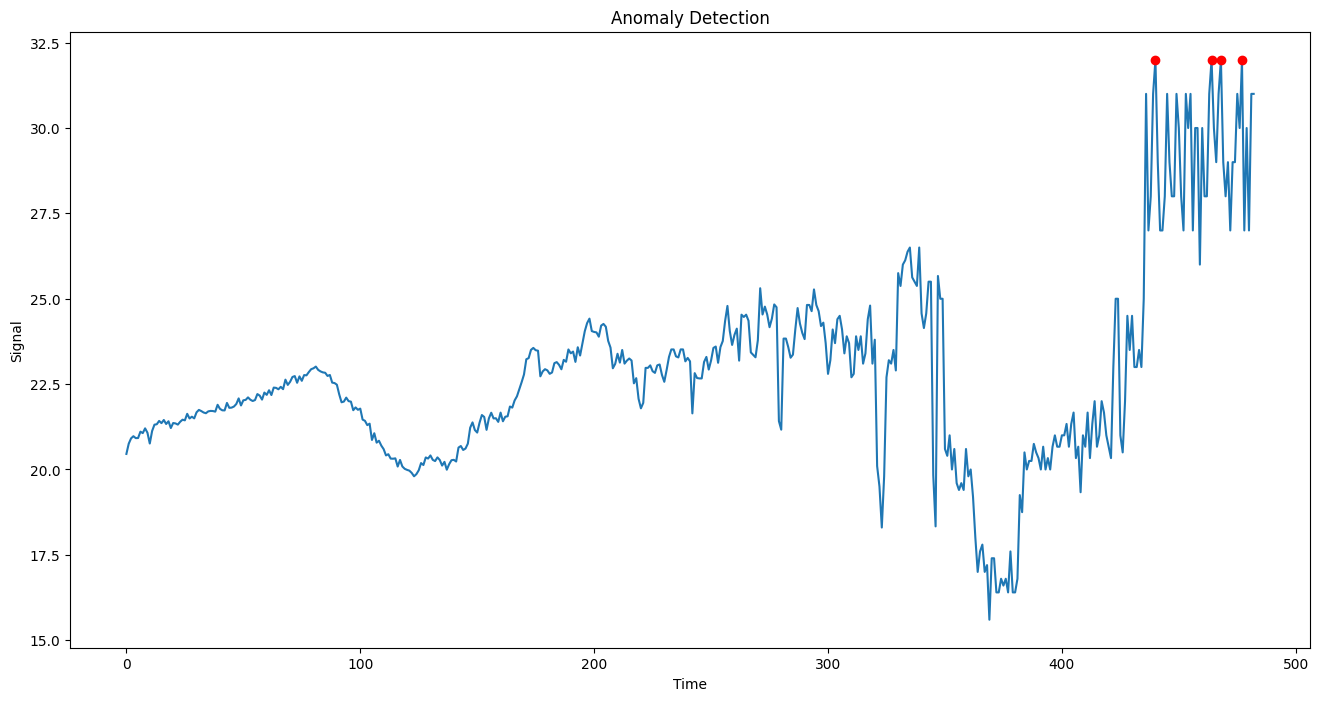

In [50]:
plt.figure(figsize=(16, 8))
plt.plot(data['sequence'],
         data['signal'])
plt.plot(data['sequence'][anomalous],
         data['signal'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()

In [51]:
data['signal'][anomalous]

440    32.0
464    32.0
468    32.0
477    32.0
Name: signal, dtype: float64